In [1]:
%matplotlib inline
import os
import pandas as pd
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
from zipline.utils.run_algo import load_extensions

# Load extensions.py; this allows you access to custom bundles
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

/anaconda3/envs/env_zipline/lib/python3.5/site-packages/empyrical/utils.py:32: UserWarning: Unable to import pandas_datareader. Suppressing import error and continuing. All data reading functionality will raise errors; but has been deprecated and will be removed in a later version.
  warnings.warn(msg)
<string>:260: UserWarning: Overwriting bundle with name 'futures'


In [2]:
# Set-Up Pricing Data Access
trading_calendar = get_calendar('CME')
bundle = 'futures'
bundle_data = bundles.load(bundle)

In [3]:
data_portal = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    future_daily_reader=bundle_data.equity_daily_bar_reader,
#    adjustment_reader=bundle_data.adjustment_reader,
)

In [4]:
continuous_future = bundle_data.asset_finder.create_continuous_future
history = data_portal.get_history_window

In [5]:
bundle_data.asset_finder.futures_exchanges

Table('futures_exchanges', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-24T16;43;22.063323/assets-6.sqlite)), Column('exchange', TEXT(), table=<futures_exchanges>, primary_key=True, nullable=False), Column('timezone', TEXT(), table=<futures_exchanges>), schema=None)

In [6]:
bundle_data.asset_finder.engine.execute('SELECT * FROM futures_exchanges').fetchall()

[]

In [7]:
cmd_str ='INSERT INTO "futures_exchanges" (exchange, timezone) VALUES ("EXCH","US")'

In [8]:
#bundle_data.asset_finder.engine.execute(cmd_str)

In [9]:
bundle_data.asset_finder.futures_contracts

Table('futures_contracts', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-24T16;43;22.063323/assets-6.sqlite)), Column('sid', INTEGER(), table=<futures_contracts>, primary_key=True, nullable=False), Column('symbol', TEXT(), table=<futures_contracts>), Column('root_symbol', TEXT(), ForeignKey('futures_root_symbols.root_symbol'), table=<futures_contracts>), Column('asset_name', TEXT(), table=<futures_contracts>), Column('start_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('end_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('first_traded', INTEGER(), table=<futures_contracts>), Column('exchange', TEXT(), ForeignKey('futures_exchanges.exchange'), table=<futures_contracts>), Column('notice_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('expiration_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('auto_close_date', INTEGER(), table=<futures_contracts>, nullable=False), Column(

In [10]:
bundle_data.asset_finder.engine.execute('SELECT * FROM futures_contracts LIMIT 10').fetchall()

[(0, '0DF2015', '0D', None, 1392681600000000000, 1482883200000000000, -9223372036854775808, 'EXCH', 1482969600000000000, 1421366400000000000, 1482969600000000000, 1.0, 0.0001),
 (1, '0DF2016', '0D', None, 1392681600000000000, 1454371200000000000, -9223372036854775808, 'EXCH', 1454457600000000000, 1452816000000000000, 1454457600000000000, 1.0, 0.0001),
 (2, '0DF2017', '0D', None, 1416528000000000000, 1485993600000000000, -9223372036854775808, 'EXCH', 1486080000000000000, 1484870400000000000, 1486080000000000000, 1.0, 0.0001),
 (3, '0DF2018', '0D', None, 1416528000000000000, 1517529600000000000, -9223372036854775808, 'EXCH', 1517616000000000000, 1516320000000000000, 1517616000000000000, 1.0, 0.0001),
 (4, '0DF2019', '0D', None, 1423699200000000000, 1537401600000000000, -9223372036854775808, 'EXCH', 1537488000000000000, 1547769600000000000, 1537488000000000000, 1.0, 0.0001),
 (5, '0DF2020', '0D', None, 1512345600000000000, 1537401600000000000, -9223372036854775808, 'EXCH', 153748800000000

In [11]:
bundle_data.asset_finder.futures_root_symbols

Table('futures_root_symbols', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-24T16;43;22.063323/assets-6.sqlite)), Column('root_symbol', TEXT(), table=<futures_root_symbols>, primary_key=True, nullable=False), Column('root_symbol_id', INTEGER(), table=<futures_root_symbols>), Column('sector', TEXT(), table=<futures_root_symbols>), Column('description', TEXT(), table=<futures_root_symbols>), Column('exchange', TEXT(), ForeignKey('futures_exchanges.exchange'), table=<futures_root_symbols>), schema=None)

In [12]:
bundle_data.asset_finder.engine.execute('SELECT * FROM futures_root_symbols').fetchall()

[('0D', 0, None, None, 'EXCH'),
 ('0F', 1, None, None, 'EXCH'),
 ('1NB', 2, None, None, 'EXCH'),
 ('1N', 3, None, None, 'EXCH'),
 ('1R', 4, None, None, 'EXCH'),
 ('1U', 5, None, None, 'EXCH'),
 ('46', 6, None, None, 'EXCH'),
 ('47', 7, None, None, 'EXCH'),
 ('4L', 8, None, None, 'EXCH'),
 ('4M', 9, None, None, 'EXCH'),
 ('4N', 10, None, None, 'EXCH'),
 ('4P', 11, None, None, 'EXCH'),
 ('58', 12, None, None, 'EXCH'),
 ('5C', 13, None, None, 'EXCH'),
 ('5Z', 14, None, None, 'EXCH'),
 ('6T', 15, None, None, 'EXCH'),
 ('6Z', 16, None, None, 'EXCH'),
 ('71', 17, None, None, 'EXCH'),
 ('7H', 18, None, None, 'EXCH'),
 ('7K', 19, None, None, 'EXCH'),
 ('7Q', 20, None, None, 'EXCH'),
 ('7Y', 21, None, None, 'EXCH'),
 ('8I', 22, None, None, 'EXCH'),
 ('8Z', 23, None, None, 'EXCH'),
 ('9F', 24, None, None, 'EXCH'),
 ('A3', 25, None, None, 'EXCH'),
 ('A5', 26, None, None, 'EXCH'),
 ('A6', 27, None, None, 'EXCH'),
 ('ABY', 28, None, None, 'EXCH'),
 ('AD', 29, None, None, 'EXCH'),
 ('AFF', 30, None,

In [13]:
bundle_data.asset_finder.futures_sids[0:10]

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [14]:
fut = bundle_data.asset_finder.lookup_future_symbol('CLF2016')

In [15]:
fut.to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2015-12-22 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2015-12-21 00:00:00+0000', tz='UTC'),
 'exchange': 'EXCH',
 'exchange_full': 'EXCH',
 'expiration_date': Timestamp('2016-01-15 00:00:00+0000', tz='UTC'),
 'first_traded': None,
 'multiplier': 1.0,
 'notice_date': Timestamp('2015-12-22 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 5044,
 'start_date': Timestamp('2010-11-22 00:00:00+0000', tz='UTC'),
 'symbol': 'CLF2016',
 'tick_size': 0.0001}

In [16]:
cl_contracts = [
    bundle_data.asset_finder.lookup_future_symbol(x)
    for x
    in ['CLF2016', 'CLG2016', 'CLH2016', 'CLJ2016', 'CLK2016', 'CLM2016']
]

In [17]:
cl_contracts

[Future(5044 [CLF2016]),
 Future(5065 [CLG2016]),
 Future(5086 [CLH2016]),
 Future(5106 [CLJ2016]),
 Future(5126 [CLK2016]),
 Future(5146 [CLM2016])]

In [59]:
start_dt = pd.Timestamp('2015-10-21', tz='UTC', offset='C')
#start_dt = pd.Timestamp('2016-01-04', tz='UTC', offset='C')
end_dt = pd.Timestamp('2016-06-01', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
cl_consecutive_contract_volume = history(
    assets=cl_contracts,
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)


/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: offset is deprecated. Use freq instead
  """Entry point for launching an IPython kernel.
/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: offset is deprecated. Use freq instead
  This is separate from the ipykernel package so we can avoid doing imports until


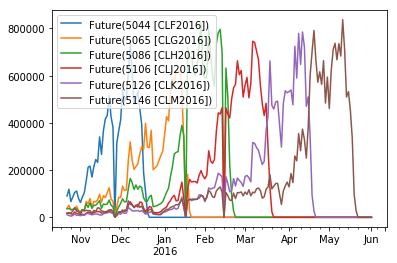

In [60]:
cl_consecutive_contract_volume.plot();

In [61]:
cl_consecutive_contract_volume['4/2016':'5/2016']

,Future(5044 [CLF2016]),Future(5065 [CLG2016]),Future(5086 [CLH2016]),Future(5106 [CLJ2016]),Future(5126 [CLK2016]),Future(5146 [CLM2016])
2016-04-01 00:00:00+00:00,0.0,0.0,0.0,0.0,532508.0,129009.0
2016-04-04 00:00:00+00:00,0.0,0.0,0.0,0.0,539482.0,185098.0
2016-04-05 00:00:00+00:00,0.0,0.0,0.0,0.0,476247.0,146986.0
2016-04-06 00:00:00+00:00,0.0,0.0,0.0,0.0,724554.0,259828.0
2016-04-07 00:00:00+00:00,0.0,0.0,0.0,0.0,589866.0,239154.0
2016-04-08 00:00:00+00:00,0.0,0.0,0.0,0.0,778871.0,354792.0
2016-04-11 00:00:00+00:00,0.0,0.0,0.0,0.0,646891.0,282532.0
2016-04-12 00:00:00+00:00,0.0,0.0,0.0,0.0,784822.0,373571.0
2016-04-13 00:00:00+00:00,0.0,0.0,0.0,0.0,722440.0,329995.0
2016-04-14 00:00:00+00:00,0.0,0.0,0.0,0.0,470095.0,250822.0


In [71]:
cl = continuous_future('CL', offset=0, roll_style='calendar', adjustment='mul')
cl

ContinuousFuture(90999980361318400, root_symbol='CL', offset=0, roll_style='calendar', adjustment='mul')

In [72]:
cl_continuous_volume = history(
    assets=[cl],
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

In [73]:
cl.start_date

Timestamp('2007-01-02 00:00:00+0000', tz='UTC')

In [74]:
cl.end_date

Timestamp('2018-09-20 00:00:00+0000', tz='UTC')

In [75]:
cl_volume_history = pd.concat([cl_consecutive_contract_volume, cl_continuous_volume], axis=1)

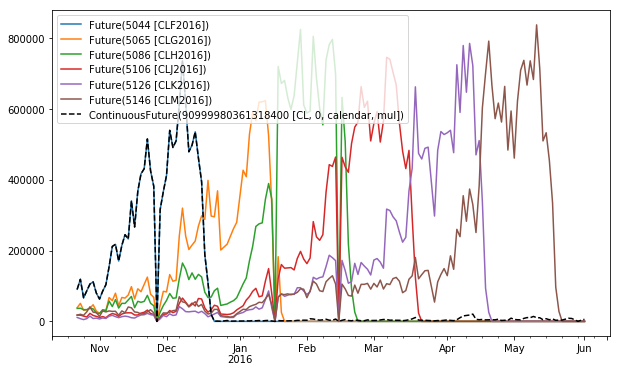

In [76]:
cl_volume_history.plot(style={cl: 'k--'}, figsize=(10,6));

In [77]:
data_portal.get_current_future_chain(cl, start_dt)

[Future(5044 [CLF2016]),
 Future(5045 [CLF2017]),
 Future(5046 [CLF2018]),
 Future(5047 [CLF2019]),
 Future(5048 [CLF2020]),
 Future(5056 [CLG2007]),
 Future(5057 [CLG2008]),
 Future(5058 [CLG2009]),
 Future(5059 [CLG2010]),
 Future(5060 [CLG2011]),
 Future(5061 [CLG2012]),
 Future(5062 [CLG2013]),
 Future(5063 [CLG2014]),
 Future(5064 [CLG2015]),
 Future(5065 [CLG2016]),
 Future(5066 [CLG2017]),
 Future(5067 [CLG2018]),
 Future(5068 [CLG2019]),
 Future(5069 [CLG2020]),
 Future(5077 [CLH2007]),
 Future(5078 [CLH2008]),
 Future(5079 [CLH2009]),
 Future(5080 [CLH2010]),
 Future(5081 [CLH2011]),
 Future(5082 [CLH2012]),
 Future(5083 [CLH2013]),
 Future(5084 [CLH2014]),
 Future(5085 [CLH2015]),
 Future(5086 [CLH2016]),
 Future(5087 [CLH2017]),
 Future(5088 [CLH2018]),
 Future(5089 [CLH2019]),
 Future(5090 [CLH2020]),
 Future(5097 [CLJ2007]),
 Future(5098 [CLJ2008]),
 Future(5099 [CLJ2009]),
 Future(5100 [CLJ2010]),
 Future(5101 [CLJ2011]),
 Future(5102 [CLJ2012]),
 Future(5103 [CLJ2013]),


In [78]:
oc = bundle_data.asset_finder.get_ordered_contracts('CL')

In [81]:
clf16_sid = bundle_data.asset_finder.lookup_future_symbol('CLF2016').sid

5044

In [25]:
oc

In [79]:
cl_contracts[0].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2015-12-22 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2015-12-21 00:00:00+0000', tz='UTC'),
 'exchange': 'EXCH',
 'exchange_full': 'EXCH',
 'expiration_date': Timestamp('2016-01-15 00:00:00+0000', tz='UTC'),
 'first_traded': None,
 'multiplier': 1.0,
 'notice_date': Timestamp('2015-12-22 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 5044,
 'start_date': Timestamp('2010-11-22 00:00:00+0000', tz='UTC'),
 'symbol': 'CLF2016',
 'tick_size': 0.0001}

In [26]:
chain = oc.active_chain(5044, start_dt.value)

In [27]:
all_chain = bundle_data.asset_finder.retrieve_all(chain)

In [28]:
all_chain

[Future(5044 [CLF2016]),
 Future(5045 [CLF2017]),
 Future(5046 [CLF2018]),
 Future(5047 [CLF2019]),
 Future(5048 [CLF2020]),
 Future(5056 [CLG2007]),
 Future(5057 [CLG2008]),
 Future(5058 [CLG2009]),
 Future(5059 [CLG2010]),
 Future(5060 [CLG2011]),
 Future(5061 [CLG2012]),
 Future(5062 [CLG2013]),
 Future(5063 [CLG2014]),
 Future(5064 [CLG2015]),
 Future(5065 [CLG2016]),
 Future(5066 [CLG2017]),
 Future(5067 [CLG2018]),
 Future(5068 [CLG2019]),
 Future(5069 [CLG2020]),
 Future(5077 [CLH2007]),
 Future(5078 [CLH2008]),
 Future(5079 [CLH2009]),
 Future(5080 [CLH2010]),
 Future(5081 [CLH2011]),
 Future(5082 [CLH2012]),
 Future(5083 [CLH2013]),
 Future(5084 [CLH2014]),
 Future(5085 [CLH2015]),
 Future(5086 [CLH2016]),
 Future(5087 [CLH2017]),
 Future(5088 [CLH2018]),
 Future(5089 [CLH2019]),
 Future(5090 [CLH2020]),
 Future(5097 [CLJ2007]),
 Future(5098 [CLJ2008]),
 Future(5099 [CLJ2009]),
 Future(5100 [CLJ2010]),
 Future(5101 [CLJ2011]),
 Future(5102 [CLJ2012]),
 Future(5103 [CLJ2013]),


In [55]:
all_chain[0].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2015-12-22 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2015-12-21 00:00:00+0000', tz='UTC'),
 'exchange': 'EXCH',
 'exchange_full': 'EXCH',
 'expiration_date': Timestamp('2016-01-15 00:00:00+0000', tz='UTC'),
 'first_traded': None,
 'multiplier': 1.0,
 'notice_date': Timestamp('2015-12-22 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 5044,
 'start_date': Timestamp('2010-11-22 00:00:00+0000', tz='UTC'),
 'symbol': 'CLF2016',
 'tick_size': 0.0001}

In [56]:
all_chain[1].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2016-12-21 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2016-12-20 00:00:00+0000', tz='UTC'),
 'exchange': 'EXCH',
 'exchange_full': 'EXCH',
 'expiration_date': Timestamp('2017-01-20 00:00:00+0000', tz='UTC'),
 'first_traded': None,
 'multiplier': 1.0,
 'notice_date': Timestamp('2016-12-21 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 5045,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLF2017',
 'tick_size': 0.0001}

In [58]:
all_chain[5].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2007-01-23 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2007-01-22 00:00:00+0000', tz='UTC'),
 'exchange': 'EXCH',
 'exchange_full': 'EXCH',
 'expiration_date': Timestamp('2007-02-16 00:00:00+0000', tz='UTC'),
 'first_traded': None,
 'multiplier': 1.0,
 'notice_date': Timestamp('2007-01-23 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 5056,
 'start_date': Timestamp('2007-01-03 00:00:00+0000', tz='UTC'),
 'symbol': 'CLG2007',
 'tick_size': 0.0001}

In [36]:
cl_cfs = []
for i in range(5):
    cl_cfs.append(continuous_future('CL', offset=i, roll_style='volume', adjustment='mul'))

In [37]:
cl_cfs

[ContinuousFuture(90999980378095616, root_symbol='CL', offset=0, roll_style='volume', adjustment='mul'),
 ContinuousFuture(90999984673062912, root_symbol='CL', offset=1, roll_style='volume', adjustment='mul'),
 ContinuousFuture(90999988968030208, root_symbol='CL', offset=2, roll_style='volume', adjustment='mul'),
 ContinuousFuture(90999993262997504, root_symbol='CL', offset=3, roll_style='volume', adjustment='mul'),
 ContinuousFuture(90999997557964800, root_symbol='CL', offset=4, roll_style='volume', adjustment='mul')]

In [45]:
ts = history(
    assets=cl_cfs,
    end_dt=start_dt,
    bar_count=1,
    frequency='1d',
    field='price',
    data_frequency='daily'
)

In [47]:
ts.T

,2015-10-21 00:00:00+00:00
"ContinuousFuture(90999980378095616 [CL, 0, volume, mul])",45.97
"ContinuousFuture(90999984673062912 [CL, 1, volume, mul])",51.27
"ContinuousFuture(90999988968030208 [CL, 2, volume, mul])",51.30
"ContinuousFuture(90999993262997504 [CL, 3, volume, mul])",59.38
"ContinuousFuture(90999997557964800 [CL, 4, volume, mul])",NaN


In [48]:
pd.Index([c.auto_close_date for c in ts.columns])

AttributeError: 'zipline.assets.continuous_futures.ContinuousFuture' object has no attribute 'auto_close_date'

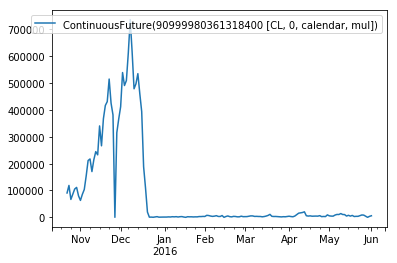

In [66]:
cl_continuous_volume.plot()

In [325]:
cf = continuous_future(
    root_symbol='US',
    offset=0,
    roll_style='volume',
    adjustment='mul'
)

In [84]:
dat = history(
    assets=[cf],
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='price',
    data_frequency='daily'
)

NameError: name 'cf' is not defined

In [327]:
dat.head()

,"ContinuousFuture(96074226540281856 [US, 0, volume, mul])"
2015-10-22 00:00:00+00:00,156.906
2015-10-23 00:00:00+00:00,155.625
2015-10-26 00:00:00+00:00,156.468
2015-10-27 00:00:00+00:00,156.812
2015-10-28 00:00:00+00:00,156.375


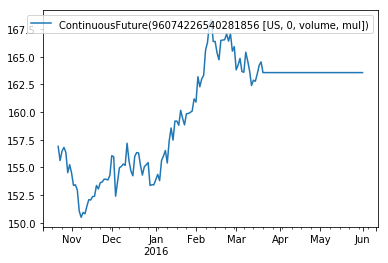

In [328]:
dat.plot()

In [329]:
US_contracts = [bundle_data.asset_finder.lookup_future_symbol(x) for x in ['USH2016', 'USM2016', 'USU2016', 'USZ2016']]

In [333]:
start_dt = pd.Timestamp('2015-10-21', tz='UTC', offset='C')
end_dt = pd.Timestamp('2016-12-29', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
US_consecutive_contract_volume = history(
    assets=US_contracts,
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='price',
    data_frequency='daily'
)

/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: offset is deprecated. Use freq instead
  """Entry point for launching an IPython kernel.
/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: offset is deprecated. Use freq instead
  


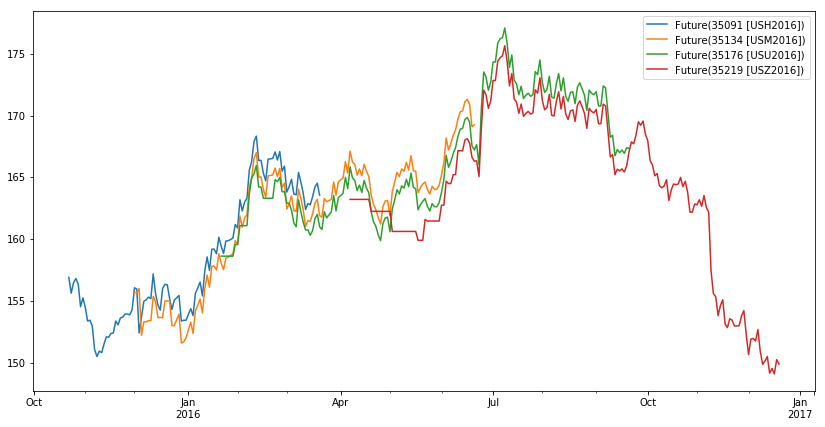

In [334]:
US_consecutive_contract_volume.plot(figsize=(14,7));

In [82]:
quandl_file = '/Users/jonathan/devwork/misc_research/zipline_install/CME_20180920.csv'

In [83]:
big_df = pd.read_csv(
        quandl_file,
        names=['symbol', 'date', 'open', 'high', 'low', 'close',
               'change', 'settle', 'volume', 'prev_day_open_int'],
        parse_dates=[1]
)

In [84]:
big_df.symbol = big_df.symbol.astype('str').str.strip()
mask1 = ~big_df.symbol.str.contains('_')
mask2 = (big_df.symbol.str.len() <=8) # ZM2018, ESU2018, CPOF2018
    #mask3 = (big_df.date > pd.Timestamp('2018-01-01'))
big_df = big_df[mask1 & mask2]

In [85]:
root = big_df.symbol.str.slice(0,2)

In [86]:
big_df.head()

,symbol,date,open,high,low,close,change,settle,volume,prev_day_open_int
0,0DF2015,2014-02-18,NaN,NaN,NaN,NaN,4.596,578.571,0.0,10.0
1,0DF2015,2014-02-19,NaN,NaN,NaN,NaN,0.862,577.709,0.0,10.0
2,0DF2015,2014-02-20,NaN,NaN,NaN,NaN,0.925,578.634,0.0,10.0
3,0DF2015,2014-02-21,NaN,NaN,NaN,NaN,1.768,576.866,3.0,10.0
4,0DF2015,2014-02-24,NaN,NaN,NaN,NaN,3.261,580.127,0.0,13.0


In [75]:
big_df[(big_df.date > pd.Timestamp('2007-01-01'))].to_csv('/Users/jonathan/devwork/misc_research/zipline_install/CME_cut_20180920.csv', header=False, index=False)


In [87]:
big_df[(root=='CL') & (big_df.date > pd.Timestamp('2007-01-01'))].to_csv('/Users/jonathan/devwork/misc_research/zipline_install/CME_CL_20180920.csv', header=False, index=False)


In [88]:
data = big_df[(root=='CL') & (big_df.date > pd.Timestamp('2007-01-01'))]

In [89]:
data.date.max()

Timestamp('2018-09-20 00:00:00')

In [90]:
data.date.min()

Timestamp('2007-01-02 00:00:00')

In [91]:
data.symbol.unique()

array(['CLF2008', 'CLF2009', 'CLF2010', 'CLF2011', 'CLF2012', 'CLF2013',
       'CLF2014', 'CLF2015', 'CLF2016', 'CLF2017', 'CLF2018', 'CLF2019',
       'CLF2020', 'CLF2021', 'CLF2022', 'CLF2023', 'CLF2024', 'CLF2025',
       'CLF2026', 'CLF2027', 'CLG2007', 'CLG2008', 'CLG2009', 'CLG2010',
       'CLG2011', 'CLG2012', 'CLG2013', 'CLG2014', 'CLG2015', 'CLG2016',
       'CLG2017', 'CLG2018', 'CLG2019', 'CLG2020', 'CLG2021', 'CLG2022',
       'CLG2023', 'CLG2024', 'CLG2025', 'CLG2026', 'CLG2027', 'CLH2007',
       'CLH2008', 'CLH2009', 'CLH2010', 'CLH2011', 'CLH2012', 'CLH2013',
       'CLH2014', 'CLH2015', 'CLH2016', 'CLH2017', 'CLH2018', 'CLH2019',
       'CLH2020', 'CLH2021', 'CLH2022', 'CLH2023', 'CLH2024', 'CLH2025',
       'CLH2026', 'CLJ2007', 'CLJ2008', 'CLJ2009', 'CLJ2010', 'CLJ2011',
       'CLJ2012', 'CLJ2013', 'CLJ2014', 'CLJ2015', 'CLJ2016', 'CLJ2017',
       'CLJ2018', 'CLJ2019', 'CLJ2020', 'CLJ2021', 'CLJ2022', 'CLJ2023',
       'CLJ2024', 'CLJ2025', 'CLJ2026', 'CLK2007', 

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218710 entries, 2674506 to 3035013
Data columns (total 10 columns):
symbol               218710 non-null object
date                 218710 non-null datetime64[ns]
open                 168064 non-null float64
high                 171107 non-null float64
low                  171413 non-null float64
close                21491 non-null float64
change               88458 non-null float64
settle               218710 non-null float64
volume               218623 non-null float64
prev_day_open_int    218623 non-null float64
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 18.4+ MB


In [99]:
data.sort_values(by='date')

,symbol,date,open,high,low,close,change,settle,volume,prev_day_open_int,root_symbol,exp_month_letter,exp_year
2674506,CLF2008,2007-01-02,67.01,67.01,67.01,NaN,NaN,67.01,885.0,24146.0,,,-1
2966380,CLX2009,2007-01-02,66.96,66.96,66.96,NaN,NaN,66.96,0.0,1300.0,,,-1
2880069,CLQ2010,2007-01-02,66.45,66.45,66.45,NaN,NaN,66.45,0.0,0.0,,,-1
2965700,CLX2008,2007-01-02,67.53,67.53,67.53,NaN,NaN,67.53,400.0,3686.0,,,-1
2729313,CLH2008,2007-01-02,67.31,67.31,67.31,NaN,NaN,67.31,533.0,16727.0,,,-1
2729823,CLH2009,2007-01-02,67.39,67.39,67.39,NaN,NaN,67.39,0.0,1952.0,,,-1
2818361,CLM2012,2007-01-02,65.31,65.31,65.31,NaN,NaN,65.31,0.0,0.0,,,-1
2816153,CLM2010,2007-01-02,66.55,66.55,66.55,NaN,NaN,66.55,0.0,0.0,,,-1
2784262,CLK2009,2007-01-02,67.29,67.29,67.29,NaN,NaN,67.29,0.0,778.0,,,-1
2783708,CLK2008,2007-01-02,67.51,67.51,67.51,NaN,NaN,67.51,100.0,6419.0,,,-1


In [100]:
def quandl_symbol_split(symbol):
    l = len(symbol)
    year = int(symbol[l-4:l+1])
    month_letter = symbol[l-5:l-4]
    root_symbol = symbol[:l-5]
    return root_symbol, month_letter, year

In [101]:
import numpy as np

In [102]:
data.reset_index(drop=True)

,symbol,date,open,high,low,close,change,settle,volume,prev_day_open_int,root_symbol,exp_month_letter,exp_year
0,CLF2008,2007-01-02,67.01,67.01,67.01,NaN,NaN,67.01,885.0,24146.0,,,-1
1,CLF2008,2007-01-03,64.40,64.45,64.21,NaN,NaN,64.21,707.0,24700.0,,,-1
2,CLF2008,2007-01-04,63.15,63.15,61.85,NaN,NaN,61.85,1169.0,24724.0,,,-1
3,CLF2008,2007-01-05,61.95,62.93,61.95,NaN,NaN,62.93,2208.0,24009.0,,,-1
4,CLF2008,2007-01-08,63.22,63.22,63.22,NaN,NaN,63.22,4243.0,23127.0,,,-1
5,CLF2008,2007-01-09,63.05,63.05,62.70,NaN,NaN,62.80,544.0,23207.0,,,-1
6,CLF2008,2007-01-10,62.70,62.70,60.85,NaN,NaN,60.85,995.0,23245.0,,,-1
7,CLF2008,2007-01-11,59.50,59.50,57.87,NaN,NaN,57.87,1523.0,24015.0,,,-1
8,CLF2008,2007-01-12,58.36,58.36,58.36,NaN,NaN,58.36,796.0,24626.0,,,-1
9,CLF2008,2007-01-16,56.35,56.35,56.35,NaN,NaN,56.35,405.0,24750.0,,,-1


In [103]:
data=data.assign(root_symbol='')
data=data.assign(exp_month_letter= '')
data=data.assign(exp_year=-1)

In [104]:
data

,symbol,date,open,high,low,close,change,settle,volume,prev_day_open_int,root_symbol,exp_month_letter,exp_year
2674506,CLF2008,2007-01-02,67.01,67.01,67.01,NaN,NaN,67.01,885.0,24146.0,,,-1
2674507,CLF2008,2007-01-03,64.40,64.45,64.21,NaN,NaN,64.21,707.0,24700.0,,,-1
2674508,CLF2008,2007-01-04,63.15,63.15,61.85,NaN,NaN,61.85,1169.0,24724.0,,,-1
2674509,CLF2008,2007-01-05,61.95,62.93,61.95,NaN,NaN,62.93,2208.0,24009.0,,,-1
2674510,CLF2008,2007-01-08,63.22,63.22,63.22,NaN,NaN,63.22,4243.0,23127.0,,,-1
2674511,CLF2008,2007-01-09,63.05,63.05,62.70,NaN,NaN,62.80,544.0,23207.0,,,-1
2674512,CLF2008,2007-01-10,62.70,62.70,60.85,NaN,NaN,60.85,995.0,23245.0,,,-1
2674513,CLF2008,2007-01-11,59.50,59.50,57.87,NaN,NaN,57.87,1523.0,24015.0,,,-1
2674514,CLF2008,2007-01-12,58.36,58.36,58.36,NaN,NaN,58.36,796.0,24626.0,,,-1
2674515,CLF2008,2007-01-16,56.35,56.35,56.35,NaN,NaN,56.35,405.0,24750.0,,,-1


In [ ]:
for index, row in data.iterrows():
    a, b, c = quandl_symbol_split(row.symbol)
    #print(
    #    str(index) + ": " + str(a) + ":" + str(b) + ":" + str(c)
    #)
    data.loc[index, 'root_symbol'], data.loc[index, 'exp_month_letter'], data.loc[index, 'exp_year'] = a, b, c

In [ ]:
data

In [ ]:
data=data.assign(expiration_date=-1)

In [ ]:
def third_friday(year, month):
    """Return datetime.date for monthly 3rd Friday expiration given year and
    month
    """
    # The 15th is the lowest third day in the month
    third = datetime.date(year, month, 15)
    # What day of the week is the 15th?
    w = third.weekday()
    # Friday is weekday 4
    if w != 4:
        # Replace just the day (of month)
        third = third.replace(day=(15 + (4 - w) % 7))
    return third

In [ ]:
data['expiration_date'] = data.apply(lambda x: third_friday(x.exp_year, x.exp_month), axis=1